In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
    

from src.model.train_and_eval import train_with_parameter_mixfunn
from src.visualization.plot_functions import (
    plot_expected_values,
    plot_states,
    plot_loss_functions,
    plot_learned_param,
    plot_fidelity
)

from src.data_simulation.jaynes_cummings_data import data_jc

import numpy as np

In [2]:
params = {"wc": 100.0, "wa": 100.0, "g1": 1, "g2": 0.0, "g3": 0.0, "g0": 0.0}
tfinal = np.pi
n_time_steps = 500
init_state = "fock"
dims = {"atom": 2, "field": 2}
picture = "geral"
epochs = 30000
n_points_loss = n_time_steps

In [3]:
models_dict, loss_dict = train_with_parameter_mixfunn(
    epochs=epochs,
    params=params,
    tfinal=tfinal,
    n_time_steps=n_time_steps,
    init_state=init_state,
    picture=picture,
    dims=dims,
    n_points_loss=n_points_loss,
    n_parameter=len(params)-2, # desconsiderar wc e wa
    is_scaled=False
)

Parameter total: 808
Parameter total: 804


/Users/rodrigosilva/Documents/Mestrado/pinn-effective-hamiltonian/.venv/lib/python3.9/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
100%|██████████| 30000/30000 [16:52<00:00, 29.63it/s]


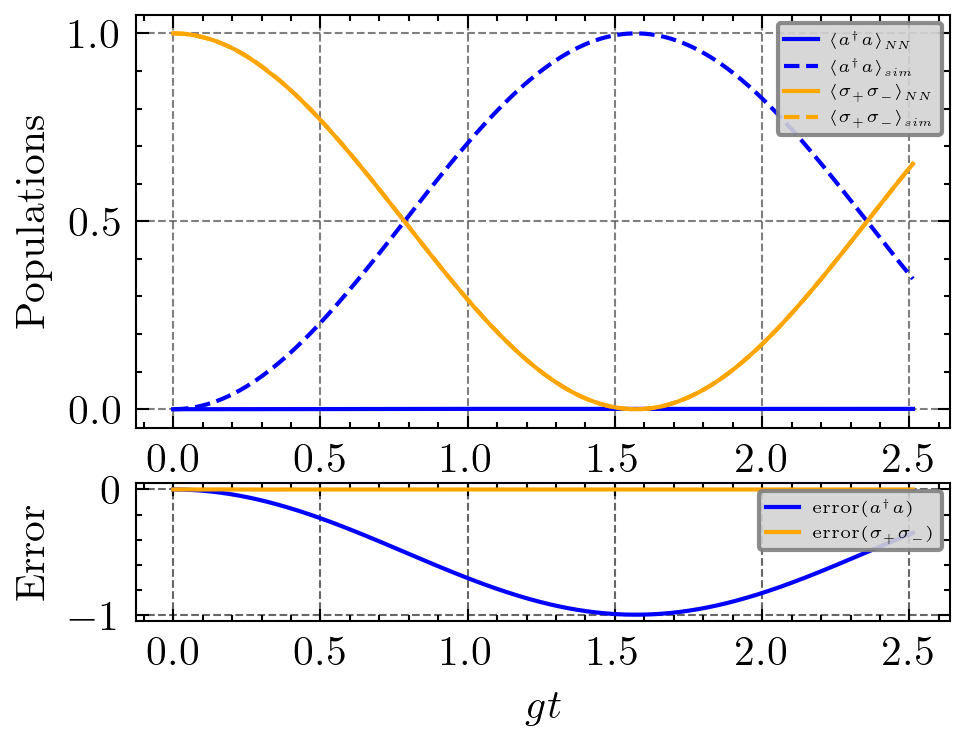

In [4]:
plot_expected_values(
    models_dict,
    tfinal,
    n_time_steps,
    init_state,
    params,
    picture,
    dims,
    is_scaled=False,
    train_or_test="train",
    plot_input="expected",
)

/Users/rodrigosilva/Documents/Mestrado/pinn-effective-hamiltonian/.venv/lib/python3.9/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


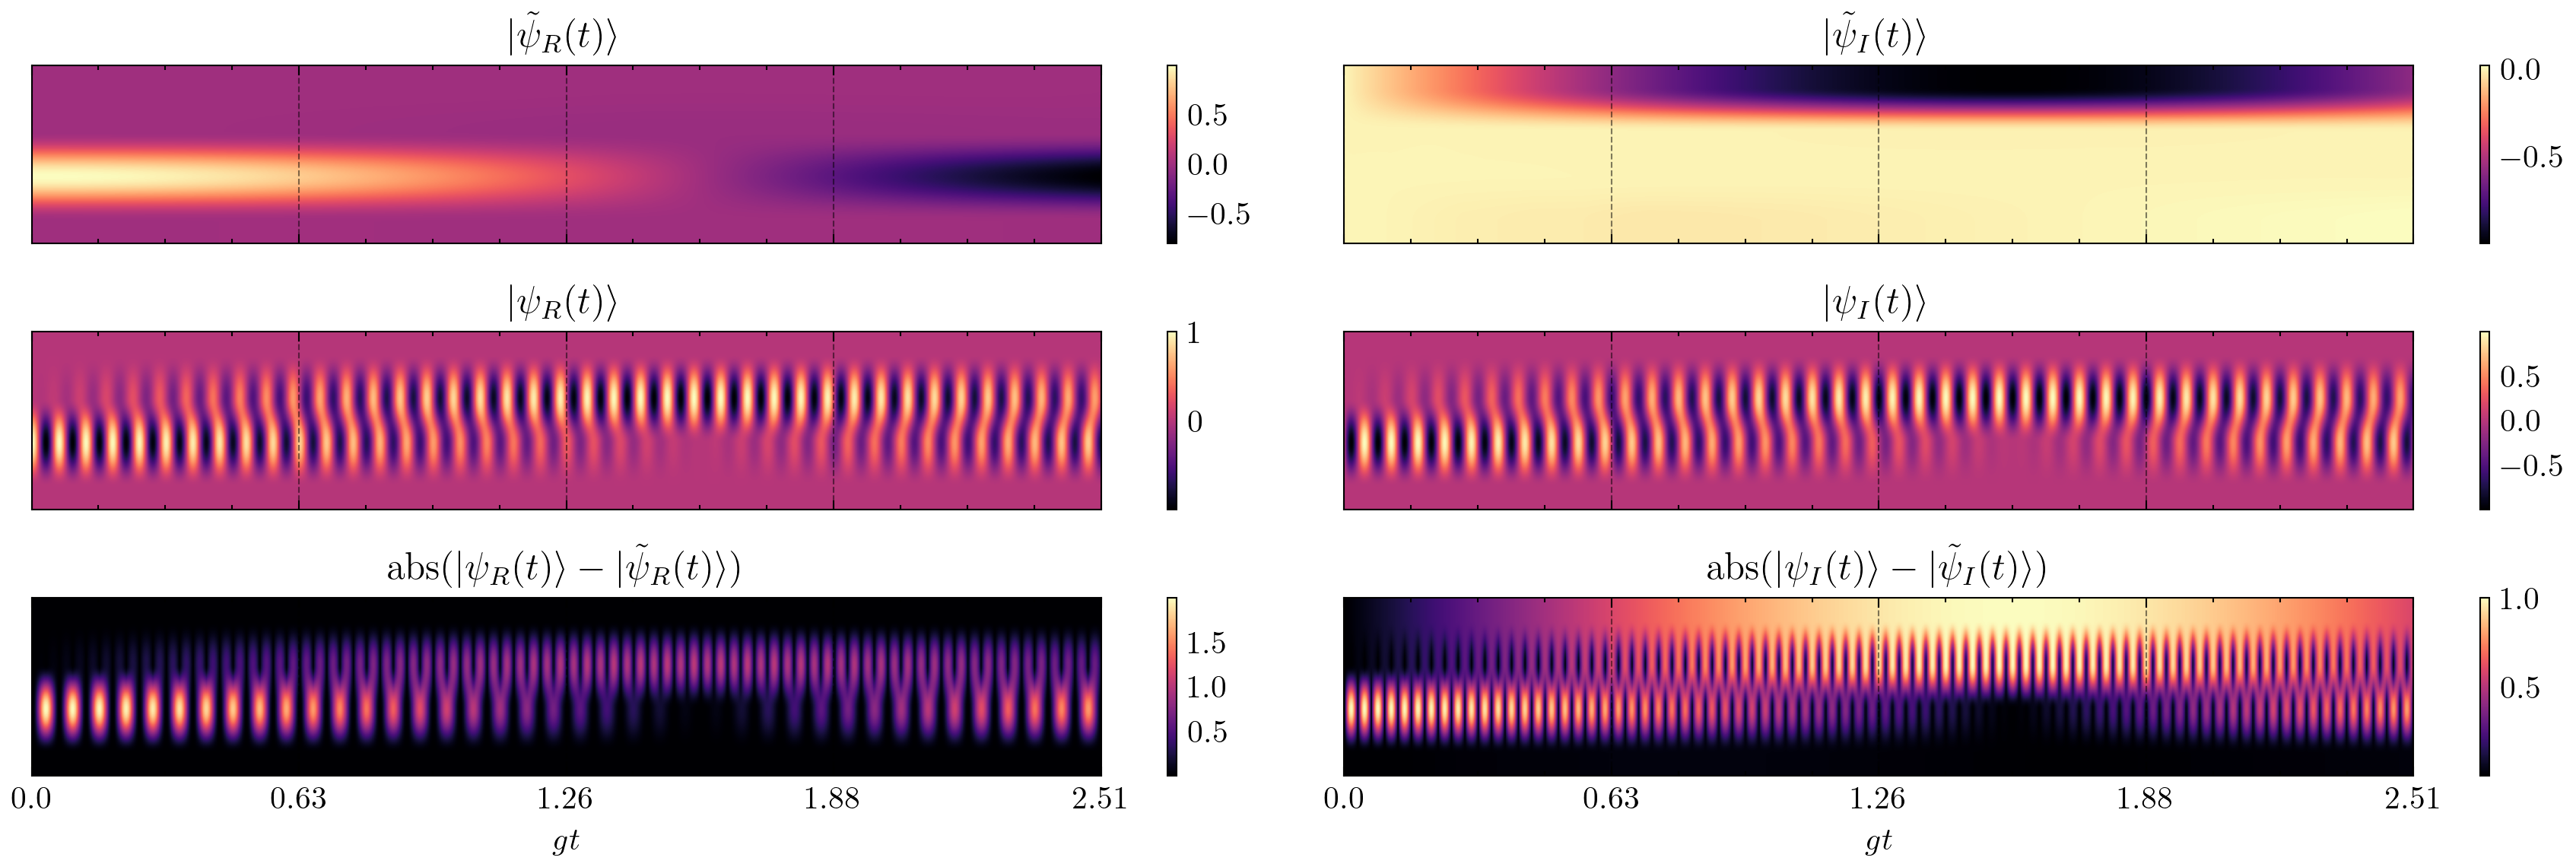

In [5]:
plot_states(
    models_dict,
    params,
    tfinal,
    init_state=init_state,
    dims=dims,
    n_time_steps=1000,
    picture=picture,
    is_scaled=False,
    train_or_test="train",
    plot_input="state",
)

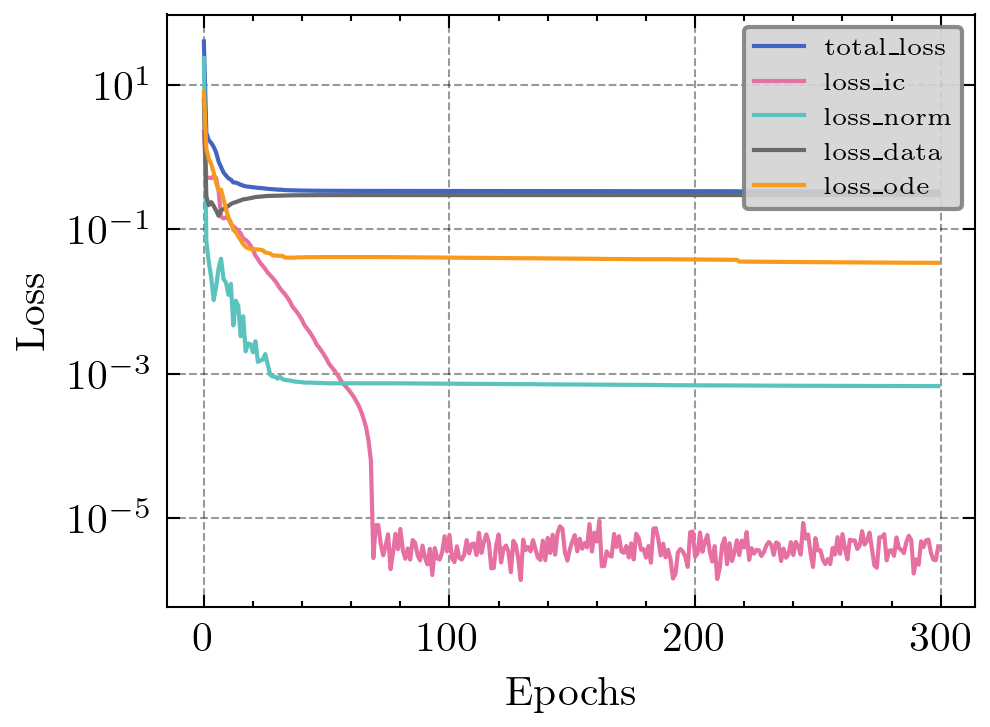

In [6]:
plot_loss_functions(loss_dict, skip_param=300)

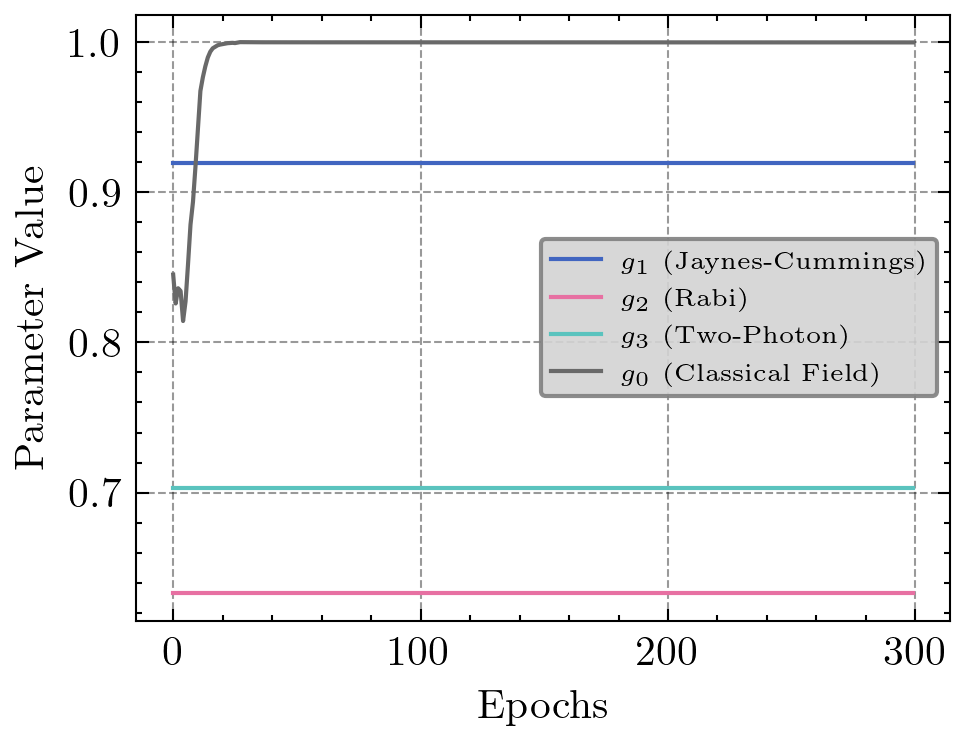

In [7]:
plot_learned_param(loss_dict, true_param=1, skip_param=300, picture=picture)

/Users/rodrigosilva/Documents/Mestrado/pinn-effective-hamiltonian/.venv/lib/python3.9/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


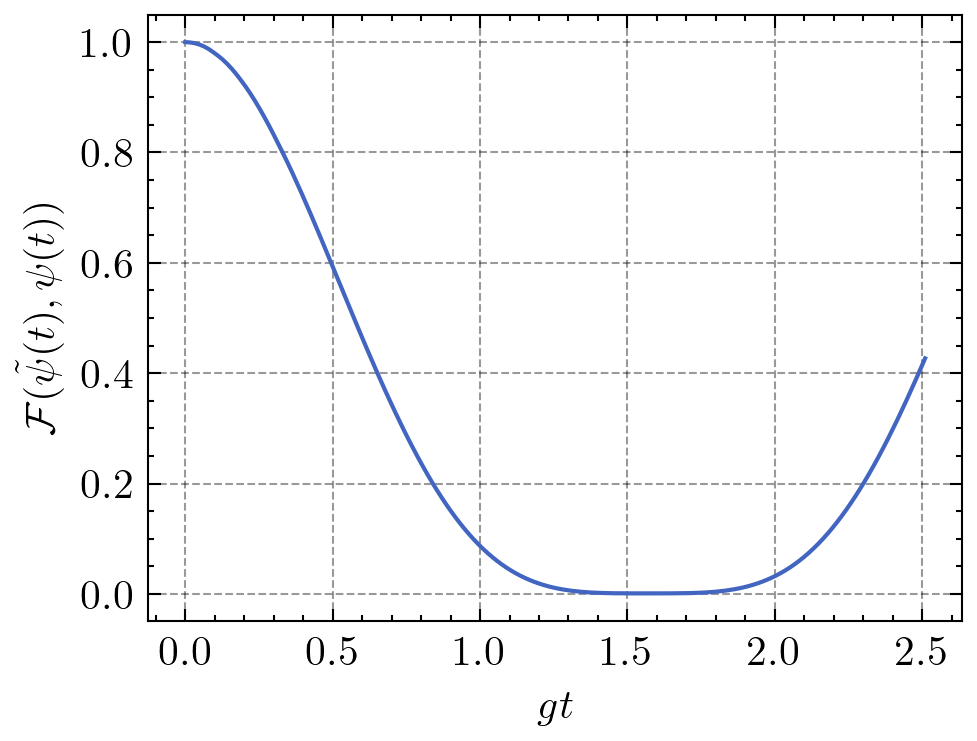

In [8]:
plot_fidelity(
    models_dict,
    params,
    tfinal,
    init_state=init_state,
    dims=dims,
    n_time_steps=200,
    picture=picture,
    is_scaled=False,
    train_or_test="train",
    plot_input="state",
)